In [18]:
from matplotlib import pyplot as plt
%matplotlib widget
import numpy as np
from pathlib import Path

In [3]:
steps_low = {
      1: 0.8e-6,
      2: 1.4e-6,
      4: 2.7e-6,
      8: 5.3e-6,
     16: 10.5e-6,
     32: 20.6e-6,
     64: 41.8e-6,
    128: 83.4e-6,
    256: 166.7e-6,
    512: 333.2e-6,
}

#steps_high = {
#      1: 0.78e-3,
#      2: 1.05e-3,
#      4: 1.44e-3,
#      8: 2.26e-3,
#     16: 3.97e-3,
#     32: 7.38e-3,
#     64: 14.33e-3,
#    128: 28.60e-3,
#    256: 124.1e-3,
#    512: 246.9e-3,
#}

# V over 120 mR shunt times pulse width
steps_high_rv = {
      1: 1.36 * 4.96e-6,
      2: 1.36 * 8.94e-6,
      4: 1.36 * 17.00e-6,
      8: 1.42 * 32.80e-6,
     16: 1.55 * 66.0e-6,
     32: 1.67 * 129.0e-6,
     64: 1.63 * 258.0e-6,
    128: 1.73 * 514e-6,
    256: 1.73 * 1028e-6,
    512: 1.77 * 2045e-6,
}

# Input current
steps_high = {
      1: 5.2e-3,
      2: 5.54e-3,
      4: 6.23e-3,
      8: 7.50e-3,
     16: 9.83e-3,
     32: 16.20e-3,
     64: 26.31e-3,
    128: 42.3e-3,
    256: 80.2e-3,
    512: 156.4e-3,
}

[]

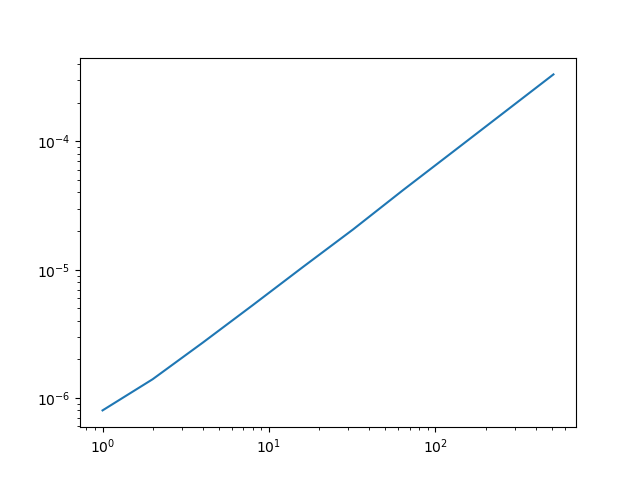

In [11]:
fig, ax = plt.subplots()
ax.plot([k for k, v in steps_low.items()], [v for k, v in steps_low.items()])
ax.loglog()

[]

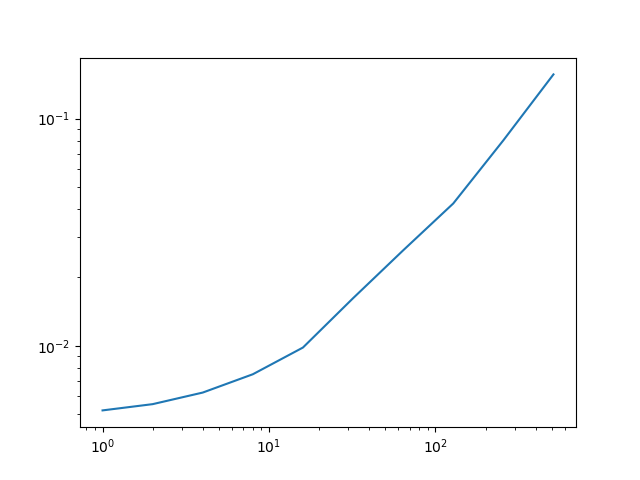

In [10]:
fig, ax = plt.subplots()
ax.plot([k for k, v in steps_high.items()], [v for k, v in steps_high.items()])
ax.loglog()

[]

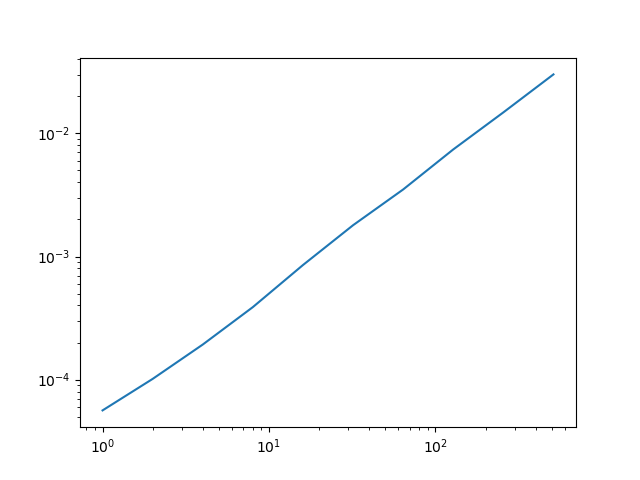

In [9]:
fig, ax = plt.subplots()
ax.plot([k for k, v in steps_low.items()], [v/0.12 for k, v in steps_high_rv.items()])
ax.loglog()

[]

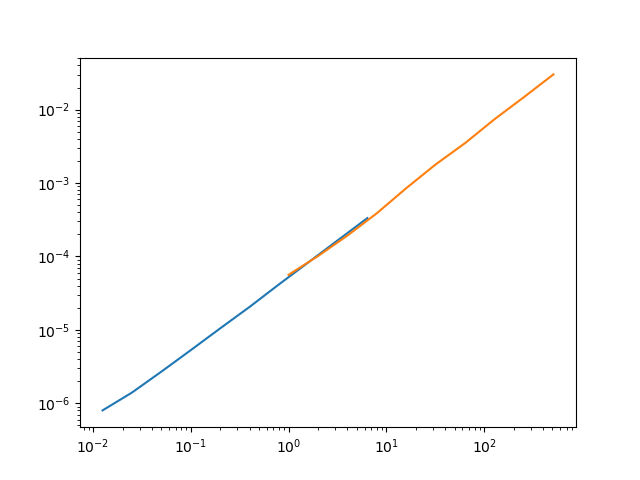

In [17]:
fig, ax = plt.subplots()
ax.plot([k/80 for k, v in steps_low.items()], [v for k, v in steps_low.items()])
ax.plot([k for k, v in steps_low.items()], [v/0.12 for k, v in steps_high_rv.items()])
ax.loglog()

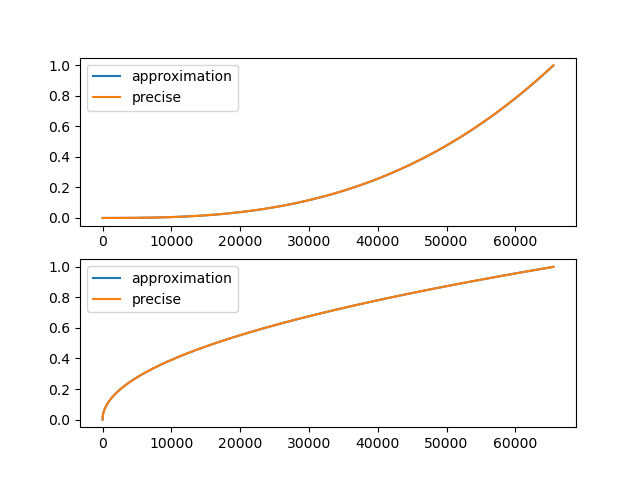

In [75]:
fig, (ax1, ax2) = plt.subplots(2)
vals = [int(x.split()[0].strip()) for x in Path('/tmp/vals').read_text().splitlines()]
sqvals = [int(x.split()[1].strip()) for x in Path('/tmp/vals').read_text().splitlines()]
ax1.plot(range(0x10000), np.array(vals)/(2**32-1), label='approximation')
ax1.plot(range(0x10000), ((np.array(range(0x10000)) / 0xffff) ** 2.75), label='precise')
ax1.legend()
ax2.plot(range(0x10000), np.array(sqvals)/(2**32-1), label='approximation')
ax2.plot(range(0x10000), (np.sqrt((np.array(range(0x10000)) / 0xffff))), label='precise')
ax2.legend()